In [1]:
import pickle
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('../../../src')
import analyze
import raybay

In [2]:
# Load treatment plan results
result = np.load('result_quad_old', allow_pickle=True)

In [5]:
# Reload goal and function dataframes (doesn't save correctly from remote)
result.goal_df = pd.read_csv('../goals.csv') 
result.func_df = pd.read_csv('funcs.csv')
pickle.dump(result, open('result_quad', 'wb')) # careful here, you just deleted your results :(

In [6]:
# Clinical goals
result.goal_df

,Roi,Type,GoalCriteria,AcceptanceLevel,ParameterValue
0,Bronchus,MaxDvh,AtMost,1560,18.52
1,Bronchus,MaxDose,AtMost,3480,NaN
2,Chestwall_L,MaxDvh,AtMost,3000,2.04
3,D2cm,MaxDose,AtMost,2400,NaN
4,Esophagus,MaxDvh,AtMost,1880,16.91
5,Esophagus,MaxDose,AtMost,3000,NaN
6,GreatVes,MaxDvh,AtMost,4300,5.66
7,GreatVes,MaxDose,AtMost,4900,NaN
8,Heart,MaxDvh,AtMost,2800,1.84
9,Heart,MaxDose,AtMost,3400,NaN


In [7]:
# Constituent functions
result.func_df

,Roi,FunctionType,DoseLevel,PercentVolume,EudParameterA,Weight
0,Bronchus,MaxDvh,1560,18.52,NaN,1
1,Bronchus,MaxDose,3480,0.00,NaN,1
2,Chestwall_L,MaxDvh,3000,2.04,NaN,1
3,D2cm,MaxDose,"[600,2400]",0.00,NaN,1
4,Esophagus,MaxDvh,1880,16.91,NaN,1
5,Esophagus,MaxDose,3000,0.00,NaN,1
6,GreatVes,MaxDvh,4300,5.66,NaN,1
7,GreatVes,MaxDose,4900,0.00,NaN,1
8,Heart,MaxDvh,2800,1.84,NaN,1
9,Heart,MaxDose,3400,0.00,NaN,1


In [14]:
# Clinical goal results
compare = pd.DataFrame()
idx_sol = np.argmin(result.opt_result.func_vals)
for idx_goal, row in result.goal_df.iterrows():
    roi = row['Roi']
    goal_type = row['Type']
    level = row['AcceptanceLevel']
    value = result.goal_dict[idx_goal][idx_sol]
    percent = 100*(value - level)/level
    compare = compare.append({'Roi': roi, 'Type': goal_type, 'AcceptanceLevel': level, 
                              'Result': value, 'PercentChange': percent}, ignore_index=True)
compare = compare[['Roi', 'Type', 'AcceptanceLevel', 'Result', 'PercentChange']] # enforce column order
compare

,Roi,Type,AcceptanceLevel,Result,PercentChange
0,Bronchus,MaxDvh,1560.0,893.745406,-42.708628
1,Bronchus,MaxDose,3480.0,2008.482178,-42.284995
2,Chestwall_L,MaxDvh,3000.0,1708.253819,-43.058206
3,D2cm,MaxDose,2400.0,2392.187744,-0.325511
4,Esophagus,MaxDvh,1880.0,657.417095,-65.031006
5,Esophagus,MaxDose,3000.0,1112.263184,-62.924561
6,GreatVes,MaxDvh,4300.0,1059.077124,-75.370299
7,GreatVes,MaxDose,4900.0,1551.151855,-68.343840
8,Heart,MaxDvh,2800.0,814.951008,-70.894607
9,Heart,MaxDose,3400.0,1428.989624,-57.970893


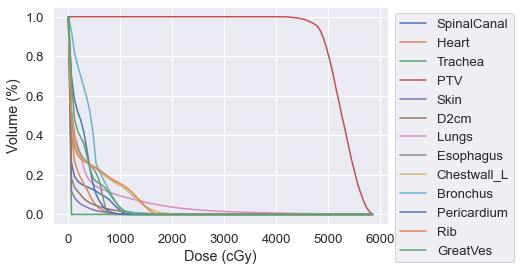

In [9]:
# Dose-volume histograms
result.dvhplot()

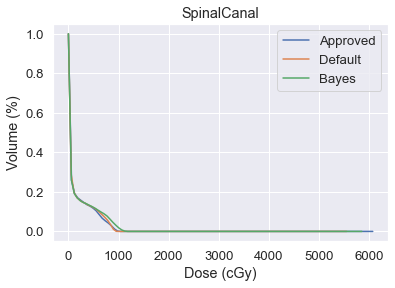

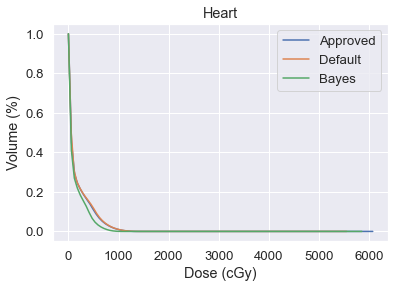

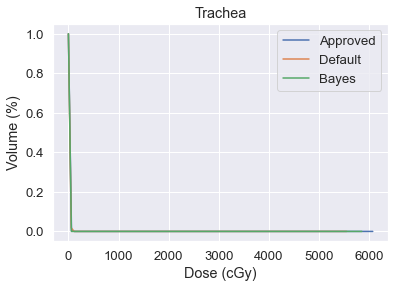

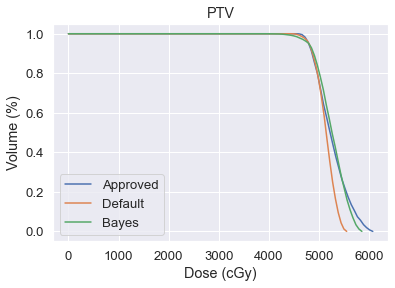

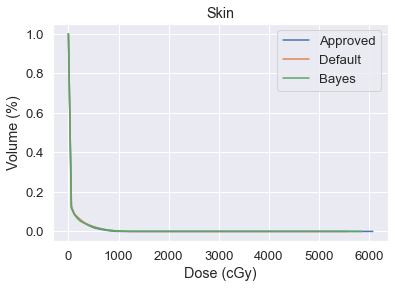

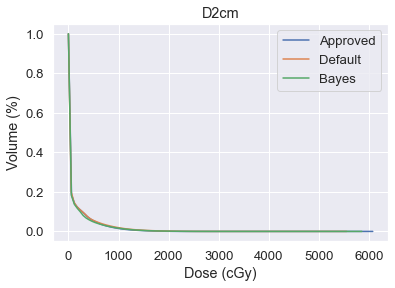

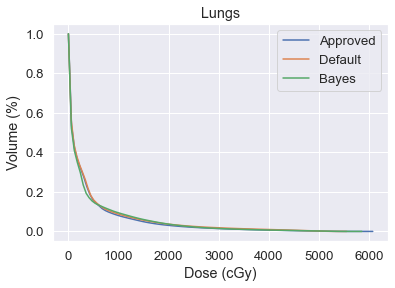

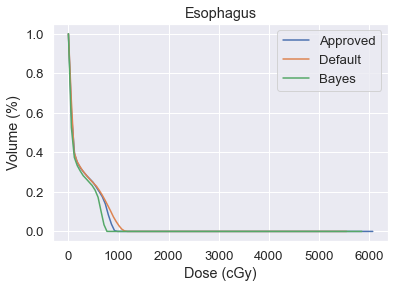

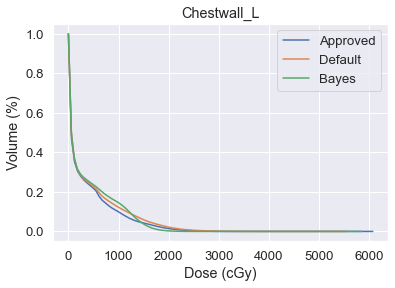

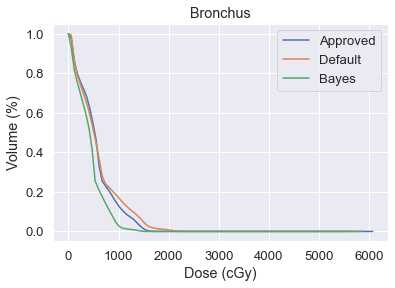

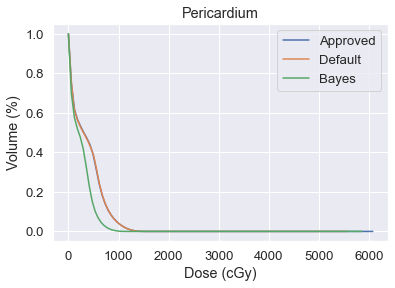

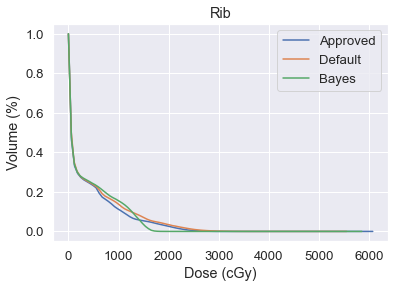

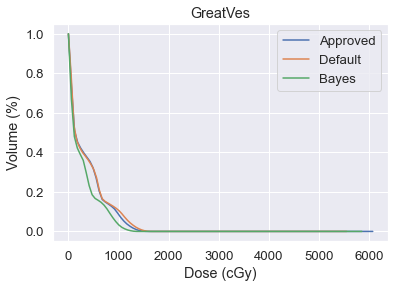

In [10]:
# Compare to approved and default plans
approved = np.load('../approved/result', allow_pickle=True)
default = np.load('../default/result', allow_pickle=True)
for roi in result.roi_list:
    plt.figure()
    plt.plot(approved.dvh_dict['Dose'], approved.dvh_dict[roi])
    plt.plot(default.dvh_dict['Dose'], default.dvh_dict[roi])
    plt.plot(result.dvh_dict['Dose'], result.dvh_dict[roi])
    plt.xlabel('Dose (cGy)')
    plt.ylabel('Volume (%)')
    plt.title(roi)
    plt.legend(['Approved', 'Default', 'Bayes'])

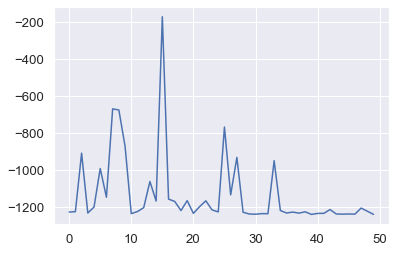

In [15]:
plt.plot(result.opt_result.func_vals)

In [20]:
np.argmin(result.opt_result.func_vals)

39

In [21]:
result.opt_result.x_iters[39]

[1089.6421971527743, 5224.956407503196, 3912.811520832849]

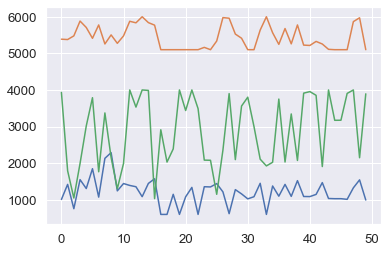

In [16]:
plt.plot(result.opt_result.x_iters)

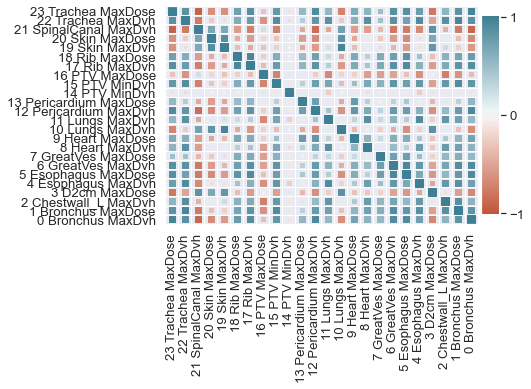

In [18]:
result.corrplot(size=50)

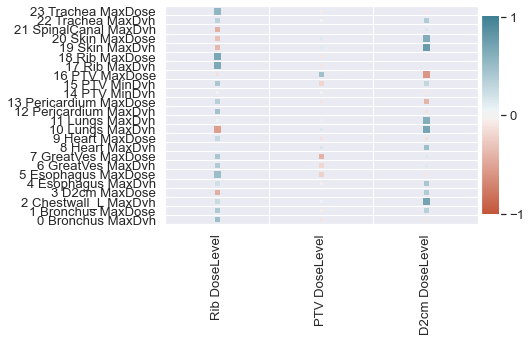

In [19]:
result.corrplot('pars', size=50)

In [7]:
x_iters = np.array(result.opt_result.x_iters)
idx_sol = np.argmin(result.opt_result.func_vals)

Text(0, 0.5, 'Objective')

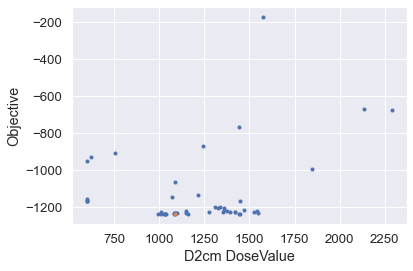

In [8]:
plt.plot(x_iters[:,0], result.opt_result.func_vals, '.')
plt.plot(x_iters[idx_sol,0], result.opt_result.func_vals[idx_sol], '.')
plt.xlabel('D2cm DoseValue')
plt.ylabel('Objective')

Text(0, 0.5, 'Objective')

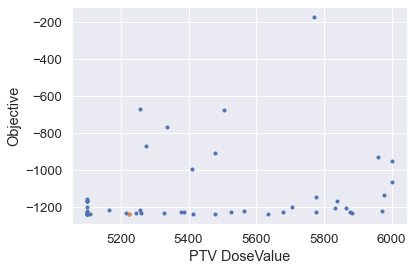

In [9]:
plt.plot(x_iters[:,1], result.opt_result.func_vals, '.')
plt.plot(x_iters[idx_sol,1], result.opt_result.func_vals[idx_sol], '.')
plt.xlabel('PTV DoseValue')
plt.ylabel('Objective')

Text(0, 0.5, 'Objective')

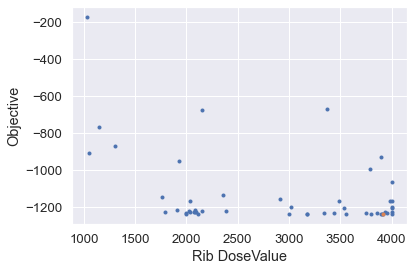

In [10]:
plt.plot(x_iters[:,2], result.opt_result.func_vals, '.')
plt.plot(x_iters[idx_sol,2], result.opt_result.func_vals[idx_sol], '.')
plt.xlabel('Rib DoseValue')
plt.ylabel('Objective')